### Блок тестовых вопросов (понадобится скорее смотреть на практическую часть)

*Выберите верные выводы на основе графиков из практического домашнего задания*: 

1. Час-пик достигается в основном в будние дни в рабочее время
2. Час-пик достигается в основном в будние дни в вечернее время и позже
3. Количество поездок в течение дня/месяца/времени суток обычно положительно коррелирует со средней продолжительностью поездок.
4. Количество поездок в течение дня/месяца/времени суток обычно отрицательно коррелирует со средней продолжительностью поездок.
5. Количество поездок в течение дня/месяца/времени суток не коррелирует со средней продолжительностью поездок.
6. Легче всего на дорогах утром – в районе 5-6 часов
7. Легче всего на дорогах ночью – в районе 1-3 часов 
8. Если для каждого месяца посмотреть на распределение среднего таргета по дням недели, то самыми “долгими” по поездкам месяца окажутся Май и Июнь
9. Если для каждого месяца посмотреть на распределение среднего таргета по дням недели, то самыми “долгими” по поездкам месяца окажутся Январь и Февраль
10. Распределение таргетной переменной одинаково для каждого дня недели
11. Распределение таргетной переменной для каждого дня недели отличается
12. В целом, можно с уверенностью сказать, что качество модели с новыми признаками вырастет по сравнению с предыдущими.


**Ответ: 1, 3, 6, 8, 11)** см. пояснения в практическом блоке

_______________________________________________________

### Блок практики

### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [1]:
import numpy as np
import pandas as pd

### Загрузим отбработанный датасет

processed_data = pd.read_csv('processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km
id,,,,,
id2875421,1,930.399753,0,455.0,1.500479
id2377394,0,930.399753,0,663.0,1.807119
id3858529,1,930.399753,0,2124.0,6.392080
id3504673,1,930.399753,0,429.0,1.487155
id2181028,1,930.399753,0,435.0,1.189925


In [2]:
### И базовый

initial_data = pd.read_csv('taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [3]:
### Не потеряли ли каких-то наблюдений?

initial_data.shape[0] == processed_data.shape[0]

True

In [4]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [5]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,trip_duration,distance_km,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,455.0,1.500479,2016-03-14 17:24:55
id2377394,0,930.399753,0,663.0,1.807119,2016-06-12 00:43:35
id3858529,1,930.399753,0,2124.0,6.392080,2016-01-19 11:35:24
id3504673,1,930.399753,0,429.0,1.487155,2016-04-06 19:32:31
id2181028,1,930.399753,0,435.0,1.189925,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [6]:
### Кастанем datetime

processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

### Выделим дату, дни недели, часы, месяц у поездок

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [11]:
processed_data = processed_data.assign(log_trip_duration = np.log1p(processed_data['trip_duration']))
processed_data = processed_data.drop(['trip_duration'], axis = 1)
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,pickup_datetime,date,day_of_week,hour,month,log_trip_duration
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,2016-03-14 17:24:55,2016-03-14,0,17,3,6.122493
id2377394,0,930.399753,0,1.807119,2016-06-12 00:43:35,2016-06-12,6,0,6,6.498282
id3858529,1,930.399753,0,6.392080,2016-01-19 11:35:24,2016-01-19,1,11,1,7.661527
id3504673,1,930.399753,0,1.487155,2016-04-06 19:32:31,2016-04-06,2,19,4,6.063785
id2181028,1,930.399753,0,1.189925,2016-03-26 13:30:55,2016-03-26,5,13,3,6.077642


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

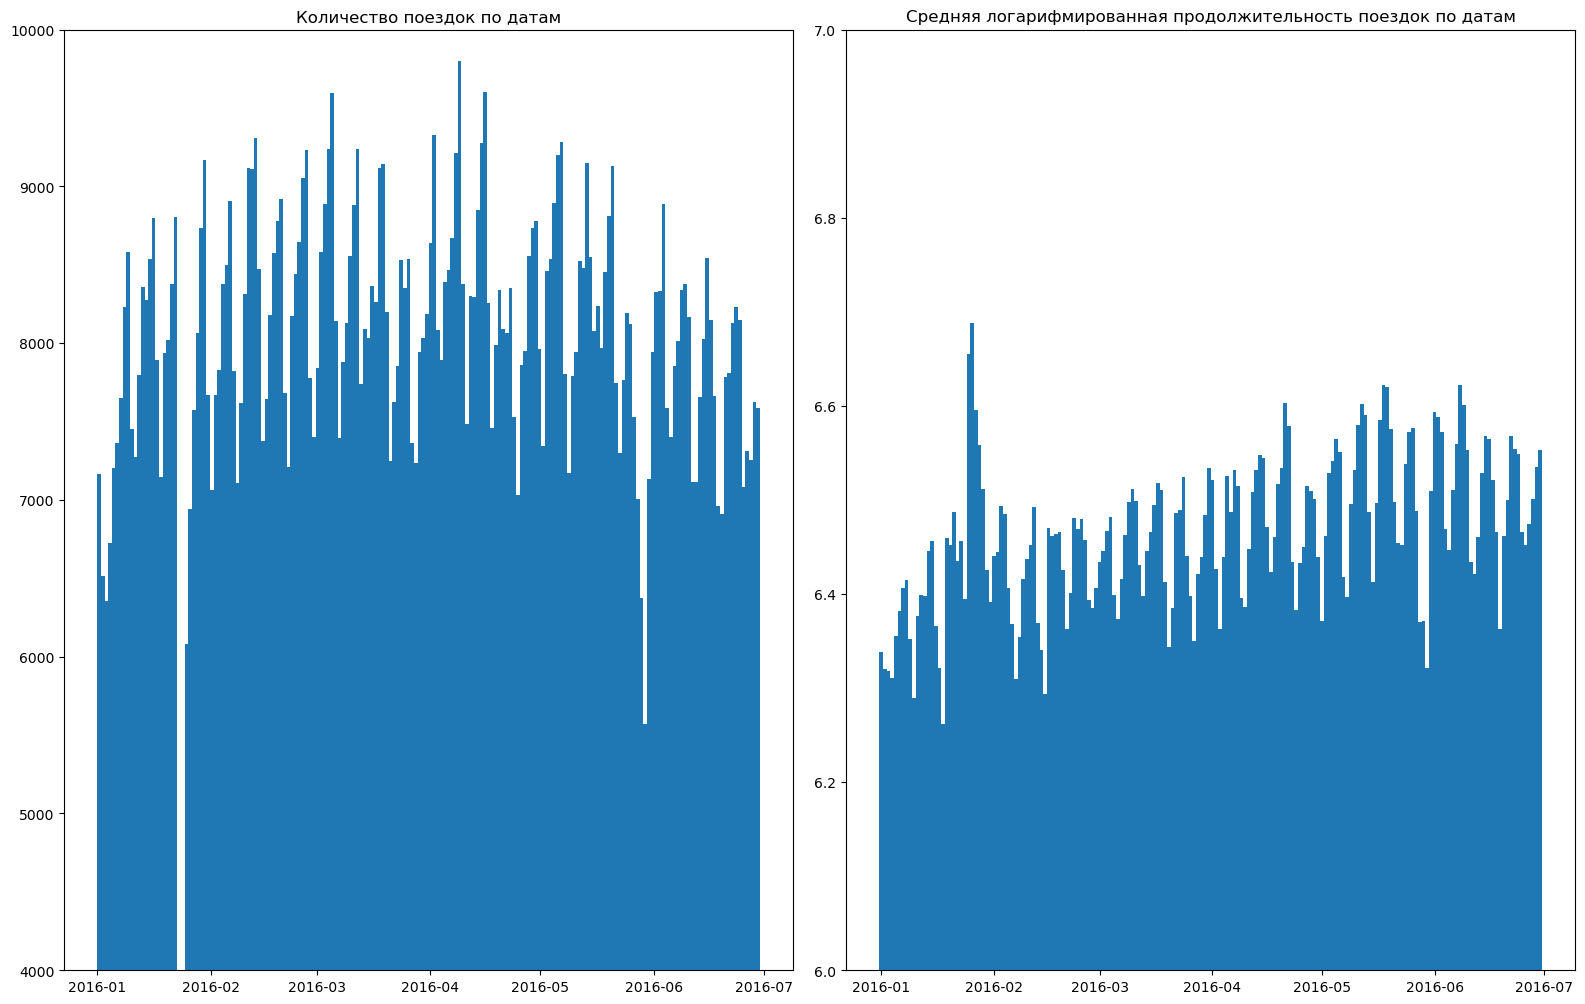

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


In [13]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,pickup_datetime,date,day_of_week,hour,month,log_trip_duration
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,2016-03-14 17:24:55,2016-03-14,0,17,3,6.122493
id2377394,0,930.399753,0,1.807119,2016-06-12 00:43:35,2016-06-12,6,0,6,6.498282
id3858529,1,930.399753,0,6.392080,2016-01-19 11:35:24,2016-01-19,1,11,1,7.661527
id3504673,1,930.399753,0,1.487155,2016-04-06 19:32:31,2016-04-06,2,19,4,6.063785
id2181028,1,930.399753,0,1.189925,2016-03-26 13:30:55,2016-03-26,5,13,3,6.077642


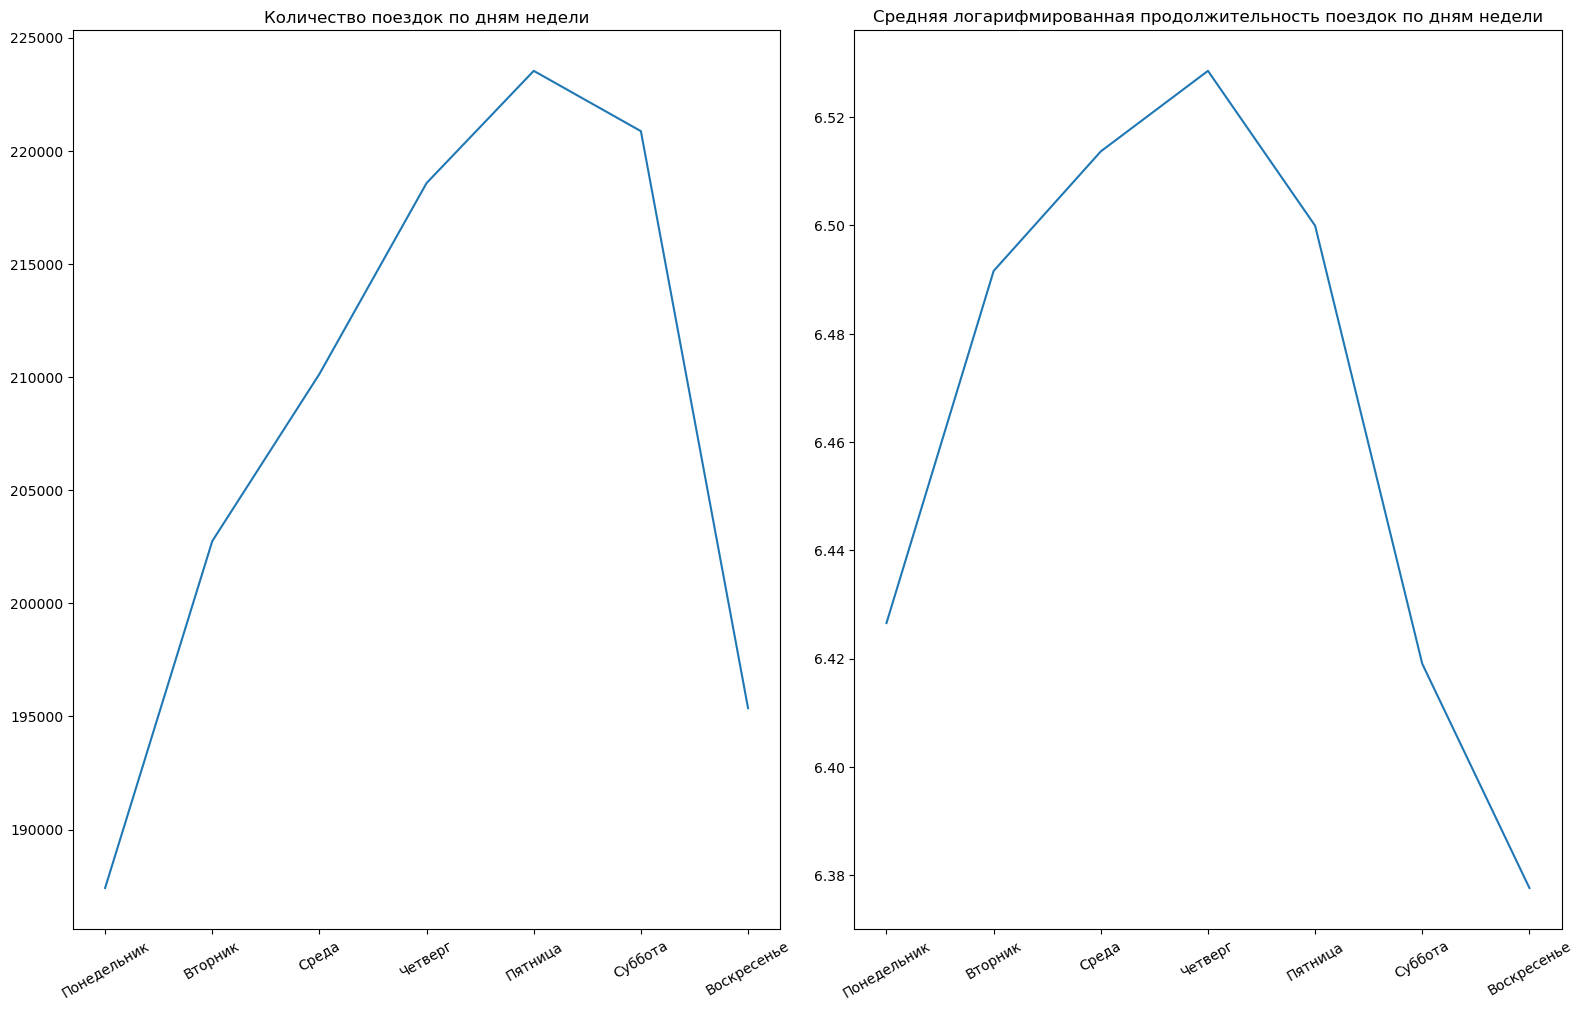

In [14]:
### Построим графики количества поездок
### И Среднего таргета по дням недели

import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.plot(processed_data.groupby(['day_of_week']).size())
plt.xticks(range(7), 
           labels=['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'],
           rotation=30)
#plt.ylim((145000, 180000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.plot(processed_data.groupby('day_of_week')['log_trip_duration'].mean())
plt.xticks(range(7), 
           labels=['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'],
           rotation=30)
#plt.ylim((700, 900))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по дням недели')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по дням недели')

plt.show()

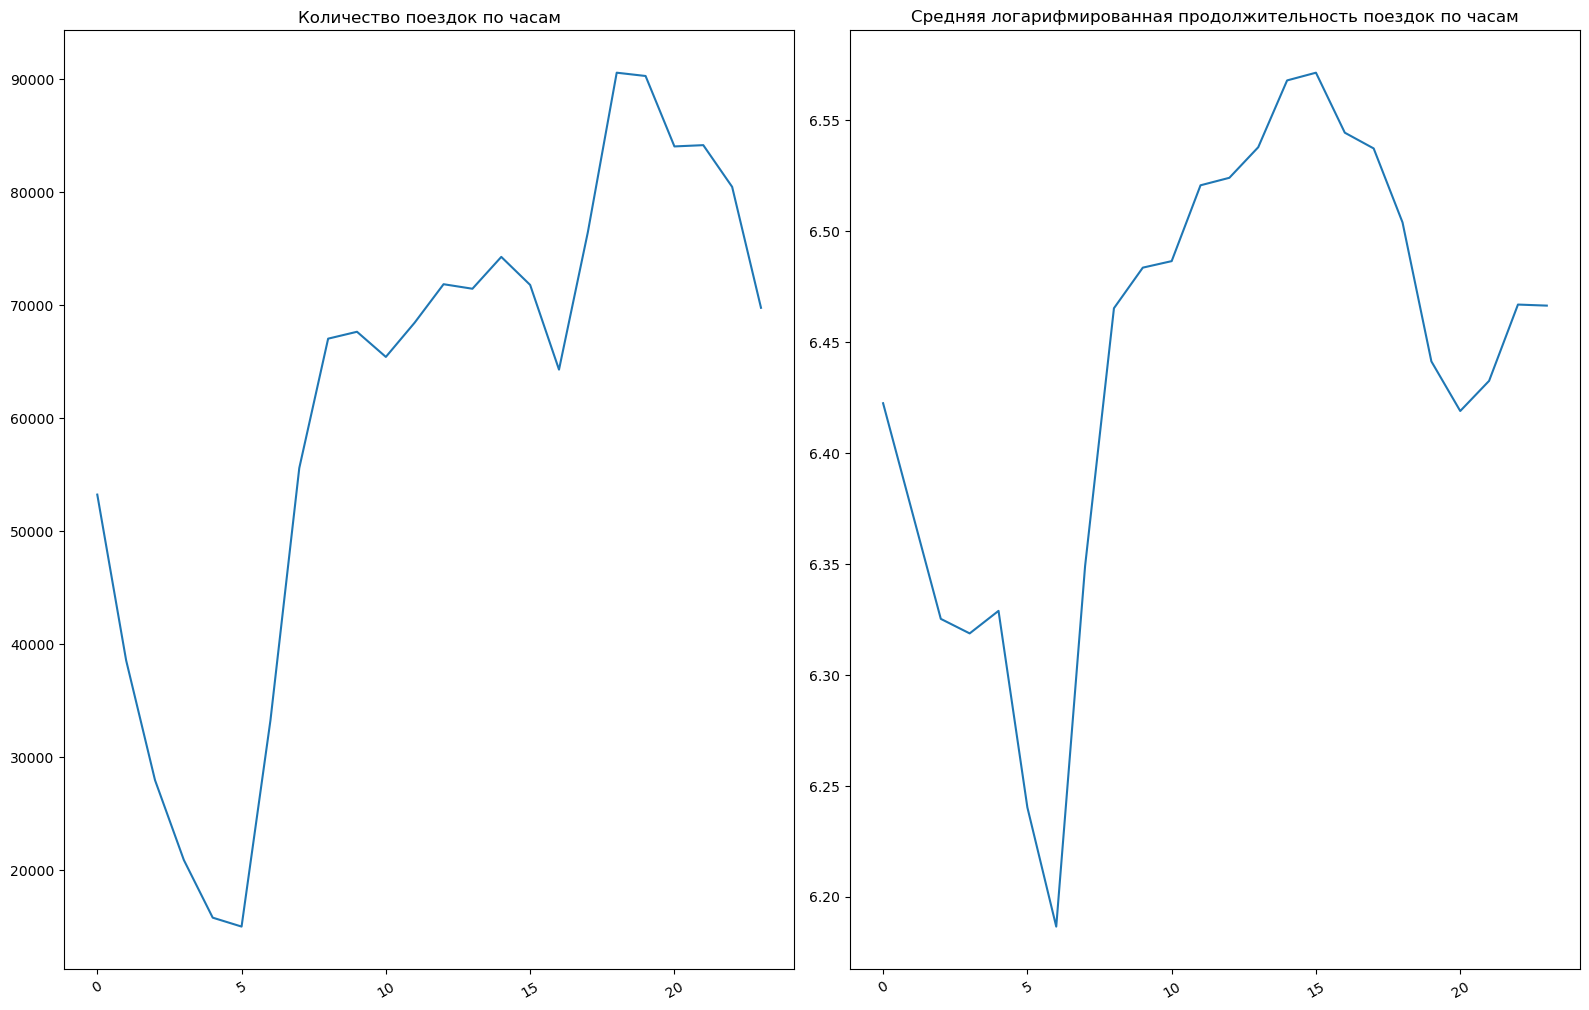

In [15]:
### Построим графики количества поездок
### И Среднего таргета по часам

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.plot(processed_data.groupby(['hour']).size())
plt.xticks(rotation=30)
#plt.ylim((145000, 180000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.plot(processed_data.groupby('hour')['log_trip_duration'].mean())
plt.xticks(rotation=30)
#plt.ylim((700, 900))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по часам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по часам')

plt.show()

↑↑↑ Видно, что количество поездок в определенный промежуток времени и соответствующее этому промежутку среднее значение таргета сильно и положительно связаны, поэтому утверждение `Количество поездок в течение дня/месяца/времени суток обычно положительно коррелирует со средней продолжительностью поездок` верно!

P.S. Обычно, говоря о том, что `два процесса кореллируют`, подразумевают любого рода однонаправленную зависимость. Статистический термин `корреляции` же в основном оценивает линейную взаимосвязь между переменными, поэтому, посчитав корреляцию между переменными, можно сделать неверный вывод, ведь она будет не мега-высокой.

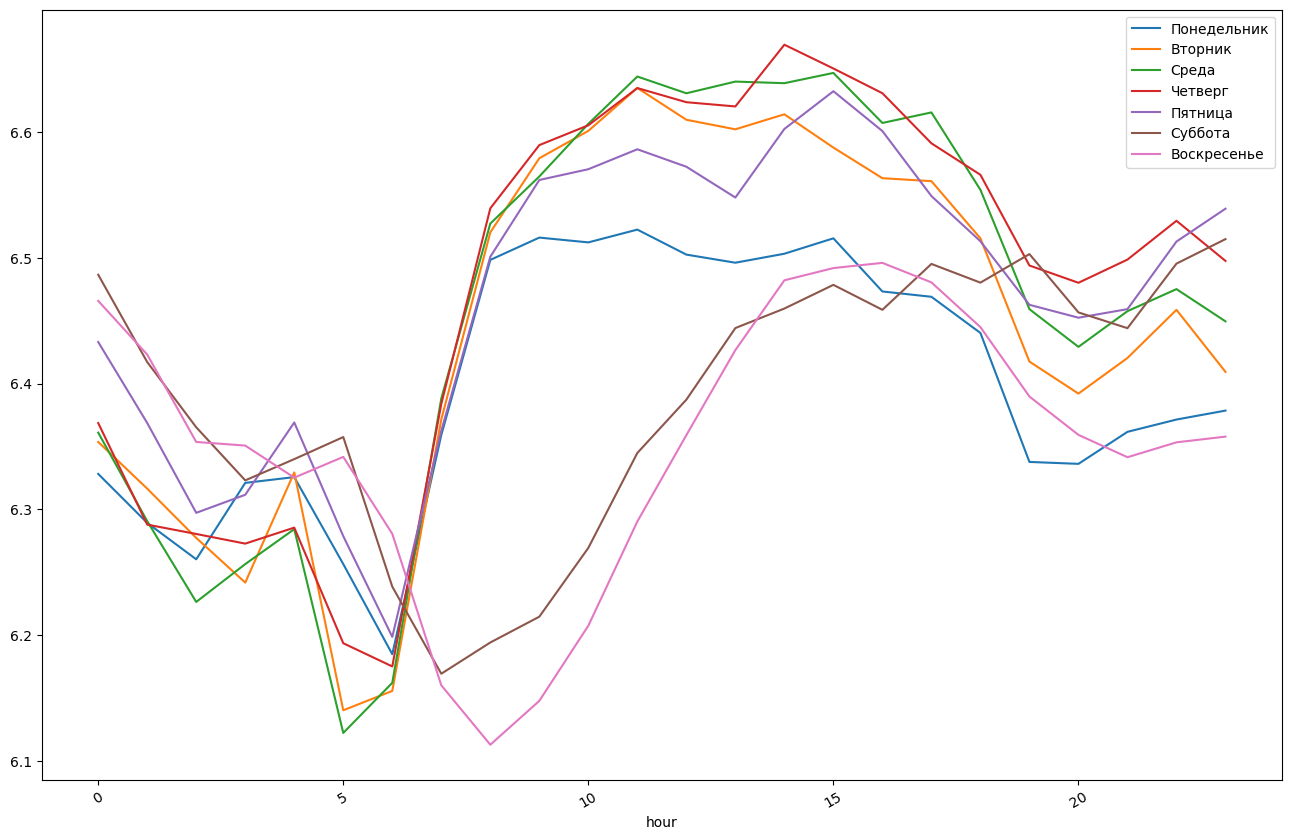

In [16]:
### Построим кривые среднего таргета
### по часам для каждого дня недели

frame = processed_data.groupby(['day_of_week', 'hour'], as_index=False)['log_trip_duration'].mean()
frame = frame.pivot(index='hour', columns='day_of_week', values='log_trip_duration')
frame.plot(figsize=(16, 10))

plt.xticks(rotation=30)

plt.legend(['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье'])

plt.show()

↑↑↑ Видно, что час-пик почти всегда приходится на рабочие часы в практически любой день недели, в районе 13-15 часов. Поэтому утверждение `Час-пик достигается в основном в будние дни в рабочее время` верное, чего нельзя сказать о `Час-пик достигается в основном в будние дни в вечернее время и позже`.

In [17]:
### Изобразим то же самое в виде тепловой карты
### Чтобы понять загруженность внутри дней недели

frame.columns = ['Понедельник', 'Вторник', 'Среда', 
                 'Четверг', 'Пятница', 'Суббота', 
                 'Воскресенье']

frame.style.background_gradient(cmap='RdPu')

,Понедельник,Вторник,Среда,Четверг,Пятница,Суббота,Воскресенье
hour,,,,,,,
0,6.328173,6.353598,6.361024,6.368642,6.433067,6.486600,6.465794
1,6.289221,6.316450,6.290582,6.287852,6.368686,6.417126,6.423073
2,6.260257,6.277271,6.226347,6.280400,6.297224,6.365256,6.353585
3,6.321038,6.241751,6.256435,6.272725,6.311585,6.323040,6.350705
4,6.325626,6.329338,6.284243,6.285450,6.369078,6.339929,6.325216
5,6.256471,6.140184,6.122148,6.193495,6.278671,6.357487,6.341709
6,6.184772,6.155556,6.162004,6.175040,6.198555,6.238505,6.280519
7,6.359147,6.371453,6.388129,6.383752,6.362452,6.169255,6.160052
8,6.498381,6.520274,6.527269,6.539392,6.500891,6.194081,6.112782


↑↑↑ Найдем среди строк самую `белую` область. Видно, что это утреннее время в будние дни в районе 5-6 часов (в выходные чуть позже). Поэтому утверждение `Легче всего на дорогах утром – в районе 5-6 часов` верно!

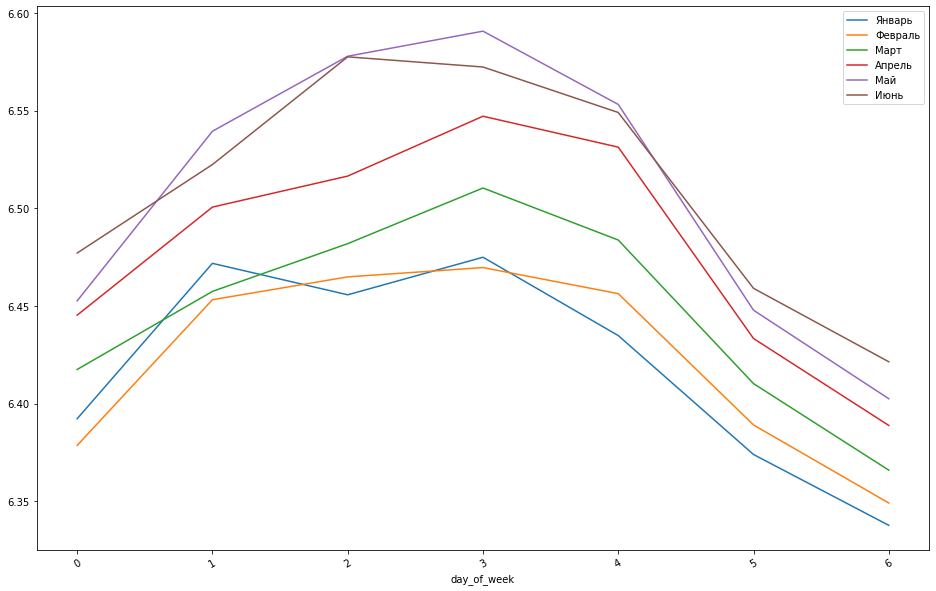

In [14]:
### А теперь для каждого месяца
### По дням недели

frame_2 = processed_data.groupby(['month', 'day_of_week'], as_index=False)['log_trip_duration'].mean()
frame_2 = frame_2.pivot(index='day_of_week', columns='month', values='log_trip_duration')
frame_2.plot(figsize=(16, 10))

plt.xticks(rotation=30)

plt.legend(['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь'])

plt.show()

↑↑↑ Найдем самые тяжелые (с наивысшими таргетными значениями в среднем по дням недели) месяцы. Окажется, что это будут Май и Июнь. Поэтому утверждение `Если для каждого месяца посмотреть на распределение среднего таргета по дням недели, то самыми “долгими” по поездкам месяца окажутся Май и Июнь` верно!

↑↑↑ Отсюда же видно, что от одного дня недели к другом средние значения таргета меняются (причем по всем месяцам), что наталкивает нас на выбор в качестве верного утверждения еще и `Распределение таргетной переменной для каждого дня недели отличается`. Это очевидно как минимум из различий в средних значениях.

Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [15]:
### Создадим первый бинарный признак

processed_data['anomaly'] = 0
processed_data.loc[processed_data.date.apply(str)=='2016-01-23', 'anomaly'] = 1

In [16]:
### Создадим второй бинарный признак

frame = processed_data.groupby(['day_of_week', 'hour'], as_index=False)['log_trip_duration'].mean()
frame = frame.pivot(index='hour', columns='day_of_week', values='log_trip_duration')

processed_data['traffic_jam'] = 0

for x in frame.unstack().sort_values(ascending=False).index[:10]:

    processed_data.loc[(processed_data.day_of_week==x[0])&(processed_data.hour==x[1]), 'traffic_jam'] = 1


In [17]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0,0


Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [18]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [19]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,5,13,3,0,0


In [20]:
for col in ['day_of_week', 'hour', 'month']:
    onehot = pd.get_dummies(processed_data[col], drop_first=True)
    onehot.columns = [f"{col}_{x}" for x in onehot.columns]
    
    processed_data = pd.concat((processed_data, onehot), axis=1)
    processed_data = processed_data.drop(col, axis=1)

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [21]:
processed_data[['passenger_count', 'distance_km']].corr()

### Оснований нет, корреляция близка к 0

,passenger_count,distance_km
passenger_count,1.000000,0.016596
distance_km,0.016596,1.000000


In [22]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=5)

x = processed_data.drop('log_trip_duration', axis=1)
y = processed_data['log_trip_duration']

sfs.fit(x, y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [24]:
### Перечислите фичи, которые окажутся наиболее желанными

sfs.get_feature_names_out()

array(['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6'],
      dtype=object)

In [25]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

model_check = LinearRegression()
model_check.fit(x[sfs.get_feature_names_out()], y)

preds = model_check.predict(x[sfs.get_feature_names_out()])

np.mean((preds-y)**2)

0.4154000234078256

In [26]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
